In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import jax
import jax.numpy as jnp
import impt
from fpfs import pltutil
import astropy.io.ascii as pyascii
plt.rcParams['figure.dpi'] = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(0.0, 1.0)

2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:04:38

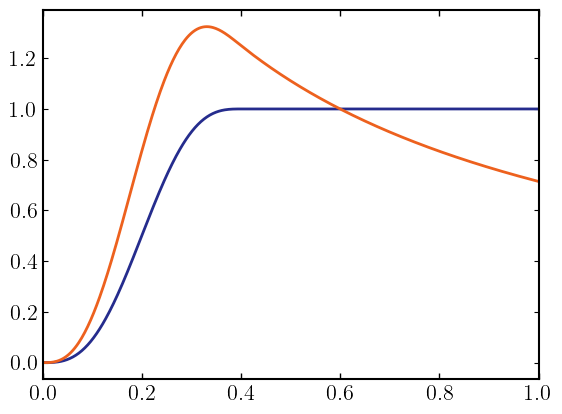

In [30]:
def funA(a):
    return impt.fpfs.utils.tsfunc2(a, mu = 0.2, sigma= 0.2 )
def funB(a):
    return impt.fpfs.utils.tsfunc2(a, mu = 0.2, sigma= 0.2 )*1./(0.4 + a)
    
x = jnp.linspace(-1., 1., 1000)
y = impt.fpfs.utils.tsfunc2(x, mu = 0.2, sigma= 0.2 )
plt.plot(x, y)
z = y* 1./(0.4 + x)
plt.plot(x, z)
plt.xlim(0, 1.)

(0.0, 1.0)

2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56 ---  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
2023/04/08 17:12:56

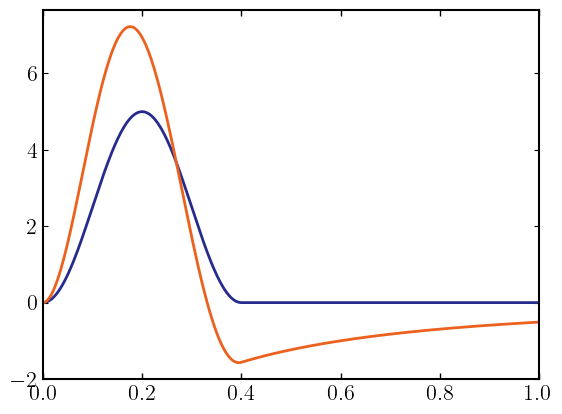

In [33]:
funA2 =  jax.grad(funA)
funB2 = jax.grad(funB)
y2 = jax.vmap(funA2)(x)
z2 = jax.vmap(funB2)(x)

plt.plot(x, y2)
plt.plot(x, z2)
plt.xlim(0, 1.)

In [23]:
outs = pyascii.read('outputs_summary/try1_bin_M00_sim_test0.csv')

In [24]:
outs

simname,binave,mbias,merr,cbias,cerr
str5,float64,float64,float64,float64,float64
test0,25.5,-0.016665350500629644,0.020743127709977417,7.551248089188795e-07,2.578969177445918e-06
test0,24.900000000000045,-0.02659819786503658,0.025891910062351094,9.234290662930618e-07,2.3204058087626474e-06
test0,24.3,-0.022791888399608176,0.03342092347766761,1.9786506074361054e-06,2.4311362719415172e-06
test0,23.700000000000003,-0.04145648883439011,0.04001252021794534,2.3878835934645803e-06,2.5805737492401252e-06
test0,23.09999999999996,-0.07318676871212372,0.06153185842953472,-1.8803475284995202e-06,2.8105840930356834e-06
test0,22.5,-0.13818887439809405,0.08724763115270263,1.2521000358527238e-06,1.7723890545758897e-06


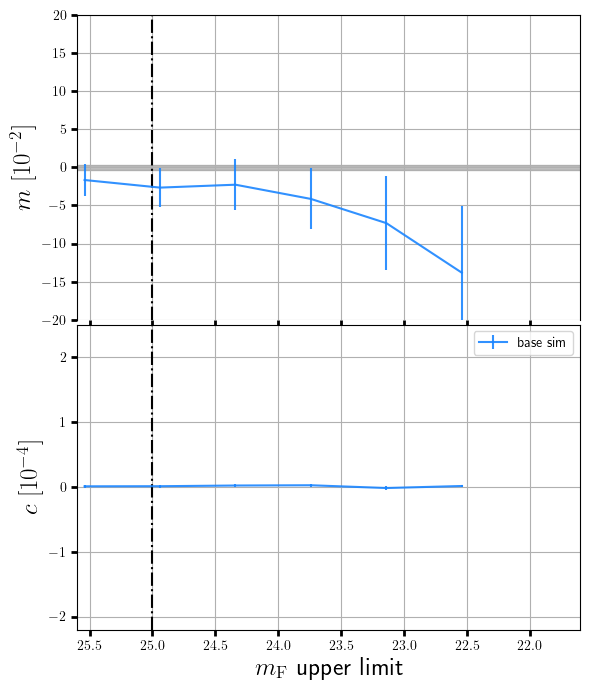

In [26]:
x=outs['binave']
y1=outs['mbias']
yerr=outs['merr']
z1=outs['cbias']
zerr=outs['cerr']

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='base sim',color=pltutil.colors[1])

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')
ax.set_ylim(-20,20.)

ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.grid()


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='base sim',color=pltutil.colors[1])
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)

In [29]:
2000*100*2000*0.168/60/60/60/60

5.185185185185186